## <center> NBA Games Project

## About Data
In this project, you’ll analyze data from the NBA (National Basketball Association) and explore possible associations.

This data was originally sourced from 538’s Analysis of the Complete History Of The NBA and contains the original, unmodified data from Basketball Reference as well as several additional variables 538 added to perform their own analysis.

You can read more about the data and how it’s being used by 538 [here.](https://github.com/fivethirtyeight/data/tree/master/nba-elo)



- **game_id:**	Unique ID for each game
- **Season id:** named based on year in which the season ended
- **Franchise id:** Multiple team_ids can fall under the same fran_id due to name changes or moves. Interactive is grouped by fran_id.
- **opp_fran:** Franchise id of opponent
- **game_location:** Home (H), away (A), or neutral (N)
- **is_playoffs:** Flag for playoff games
- **pts:** Points scored by team
- **opp_pts:**	Points scored by opponent
- **game_result:**	Win or loss for team
- **forecast:**	Elo-based chances of winning for the team, based on elo ratings and game location
- **point_diff:** the difference between pts and opp_pts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Analyzing relationships between Quant and Categorical

##### Exercise 1
Load the dataset and print the first five rows of this dataframe using the ``.head()``. <br>

In [2]:
nba = pd.read_csv("nba_games.csv")
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


##### Exercise 2
Divide the data into two, 2010 and 2014.

In [4]:
nba_2010 = nba[nba["year_id"] == 2010]
nba_2014 = nba[nba["year_id"] == 2014]

##### Exercise 3
Suppose you want to compare the knicks to the nets with respect to points earned per game. <br>
Using the `pts` column from the `nba_2010` DataFrame, create two series named `knicks_pts`(`fran_id = "Knicks"`) and <br>`nets_pts`(`fran_id = "Nets"`) that represent the points each team has scored in their games.

In [10]:
knicks_pts = nba_2010[nba_2010["fran_id"] == "Knicks"]["pts"]
nets_pts = nba_2010[nba_2010["fran_id"] == "Nets"]["pts"]

##### Exercise 4

Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful.<br>
Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets.<br>
Use the series you created in the previous exercise and the code below to create the plot.<br>
Do the distributions appear to be the same?

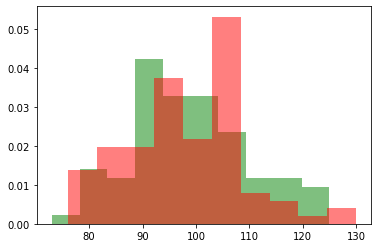

In [55]:
plt.hist(knicks_pts, color="green", density=True, alpha=0.5)
plt.hist(nets_pts,color="red", density=True, alpha=0.5)
plt.show()
plt.close()
# I think distributions don't appear to be the same. But there is some similarity...

##### Exercise 5
Now, let’s compare the 2010 games to 2014. Replicate the steps from the previous three exercises using `nba_2014`. <br>
First, calculate the mean difference between the two teams points scored. Save and print the value as `diff_means_2014`.<br> 
Did the difference in points get larger or smaller in 2014? Then, plot the overlapping histograms. <br>
Does the mean difference you calculated make sense?

In [20]:
knicks_pts = nba_2014[nba_2014["fran_id"] == "Knicks"]["pts"]
nets_pts = nba_2014[nba_2014["fran_id"] == "Nets"]["pts"]

In [21]:
diff_means_2014 = knicks_pts.mean() - nets_pts.mean()
diff_means_2014

0.44706798131809933

In [24]:
# The mean difference does not make sense. The difference between them is very small.

##### Exercise 6

For the remainder of this project, we’ll focus on data from 2010.<br>
Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.<br>

Using `nba_2010`, generate side-by-side boxplots with points scored (`pts`) on the y-axis and team (`fran_id`) on the x-axis. <br>
Is there any overlap between the boxes? Does this chart suggest that `fran_id` and `pts` are associated? <br>
Which pairs of teams, if any, earn different average scores per game?<br>

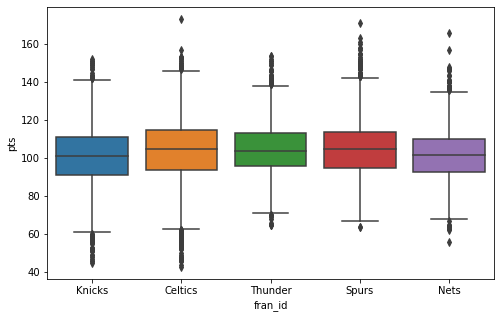

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=nba, x="fran_id", y="pts");

In [28]:
# There is no discernible average score difference between the teams. 
# The average scores of all teams are close to each other and around 100.

## Analyzing relationships between Categorical variables

##### Exercise 7
Do teams tend to win more games at home compared to away?

Data scientists will often calculate a contingency table of frequencies to help them determine if categorical variables are associated.<br>
Calculate a table of frequencies that shows the counts of `game_result` and `game_location`.

Save your result as `location_result_freq` and print your result. Based on this table, do you think the variables are associated?

In [29]:
location_result_freq = pd.crosstab(nba["game_result"], nba["game_location"])
location_result_freq

game_location,A,H,N
game_result,,,
L,7105,4298,3
W,5003,7942,8


In [30]:
# I think the variables are associated. Because teams lost less and won more at home.

##### Exercise 8
Convert this table of frequencies to a table of proportions and save the result as `location_result_proportions`. Print your result.

In [31]:
location_result_proportions = location_result_freq / len(nba)
location_result_proportions

game_location,A,H,N
game_result,,,
L,0.291679,0.176444,0.000123
W,0.205386,0.326040,0.000328


##### Exercise 9
Using the contingency table created in the previous exercise (Ex. 7), calculate the expected contingency table (if there were no association) and the Chi-Square statistic and print your results.<br>
Does the actual contingency table look similar to the expected table — or different? <br>
Based on this output, do you think there is an association between these variables?

In [32]:
chi2, pval, dof, expected = stats.chi2_contingency(location_result_freq)

In [33]:
chi2

1359.2878749575696

In [34]:
# The result is very high. I think there is an association between these variables.

## Analyzing Relationships Between Quantitative Variables

##### Exercise 10
Did teams with a higher probability of winning (according to 538) also tend to win games by more points?<br>
Using `nba_2010`, calculate the covariance between forecast (538’s projected win probability) and `point_diff` (the margin of victory/defeat) in the dataset. Save and print your result.<br>
Looking at the matrix, what is the covariance between these two variables?

In [43]:
cov = np.cov(nba_2010["forecast"], nba_2010["point_diff"])[0,1]
cov

1.3746125676458794

In [44]:
print(f"The covariance between these two varibles is {cov}.")

The covariance between these two varibles is 1.3746125676458794.


##### Exercise 11
Using `nba_2010`, calculate the correlation between `forecast` and `point_diff`. Save and print your result. <br>
Does this value suggest an association between the two variables?

In [51]:
corr, p = stats.pearsonr(nba["forecast"], nba["point_diff"])
print(f"""The correlation between these two variables is {round(corr,2)}.
Generally, a correlation larger than about .3 indicates a linear association.""")

The correlation between these two variables is 0.46.
Generally, a correlation larger than about .3 indicates a linear association.


##### Exercise 12
Generate a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis). Does the correlation value make sense?

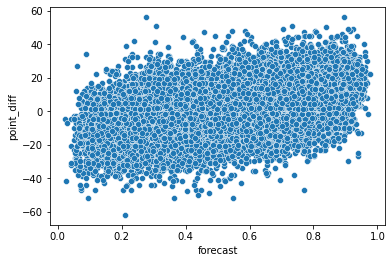

In [53]:
sns.scatterplot(data=nba, x="forecast", y="point_diff");

In [54]:
# There seems to be little correlation.